In [10]:
%reload_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import glob
from IPython.display import display, clear_output, HTML
from util import *
import requests 
import time

from sites.config import *
from util.general_util import *
from util.data_util import *

import warnings
warnings.filterwarnings('ignore')

In [40]:
gridsize = 15
windowsize = 5000
avgstep = 100

In [14]:
site = MtrKlb()
site_name = site.name
constraints1 = site.constraints1
constraints2 = site.constraints2
# ap_list = site.ap_list

map_path = os.path.join('..',site.map_path)
log_dir = os.path.join('..',site.log_dir)
dataset_dir = os.path.join('..',site.dataset_dir)
rp_locs = generate_line_grid(constraints1, gridsize) + generate_filled_grid(constraints2, gridsize)

## grid

Number of Grids is 142


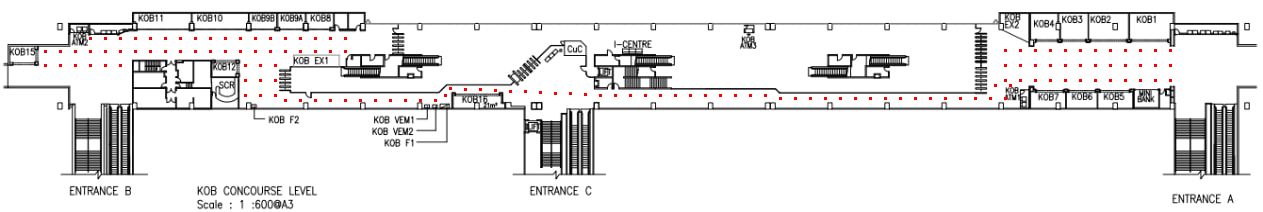

In [88]:
r = 1
print ("Number of Grids is " + str(len(rp_locs)))

constraints1 = [[90,355,38,38], [45,355,51,51], [45,125,65,65],
                [285,450,100,100], [450,610,88,95], [445,450,95,100], 
                [615, 770, 95,95], [780, 1020, 98,98], [995, 1020, 85,85], 
               ]
constraints2 = [[(245,245,275,275), (65,100,100,65)],
                [(1005,1005,1160,1160), (50,85,85,50)]
               ]
rp_locs = generate_line_grid(constraints1, gridsize) + generate_filled_grid(constraints2, gridsize)

im = Image.open(map_path)
draw = ImageDraw.Draw(im)
for j in range(0, len(rp_locs)):
    draw.ellipse((rp_locs[j][0]-r, rp_locs[j][1]-r, rp_locs[j][0]+r, rp_locs[j][1]+r), fill=(255,0,0,255))

display(im)

## wifi fingerprint

In [93]:
%matplotlib widget
fp_features, fp_locs, _ = read_wifi_fingerprint(glob.glob(os.path.join(dataset_dir, 'n*_WiFi.txt')))
# fp_features, fp_locs, _ = read_ble_fingerprint(glob.glob(os.path.join(log_dir, 'm*_Ble.txt')))


fig, ax = plt.subplots()
im = plt.imread(map_path)
ax.imshow(im)
for x, y in fp_locs:
    plt.plot(x,y, 'ro', ms=1)

fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
rp_features = compute_reference_features(rp_locs, fp_features, fp_locs)

In [23]:
ap_ind = 0

fig, ax = plt.subplots(dpi=100)
ax.imshow(im)

heatmap = np.zeros(im.shape[:2])

for feature, loc in zip(rp_features[:,ap_ind], rp_locs):
    x, y = loc
    heatmap[int(y-gridsize/2):int(y+gridsize/2), int(x-gridsize/2):int(x+gridsize/2)] += feature

heatmap = np.ma.masked_where(heatmap == 0, heatmap)
    
ax.imshow(heatmap)

fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## magnetic fingerprint

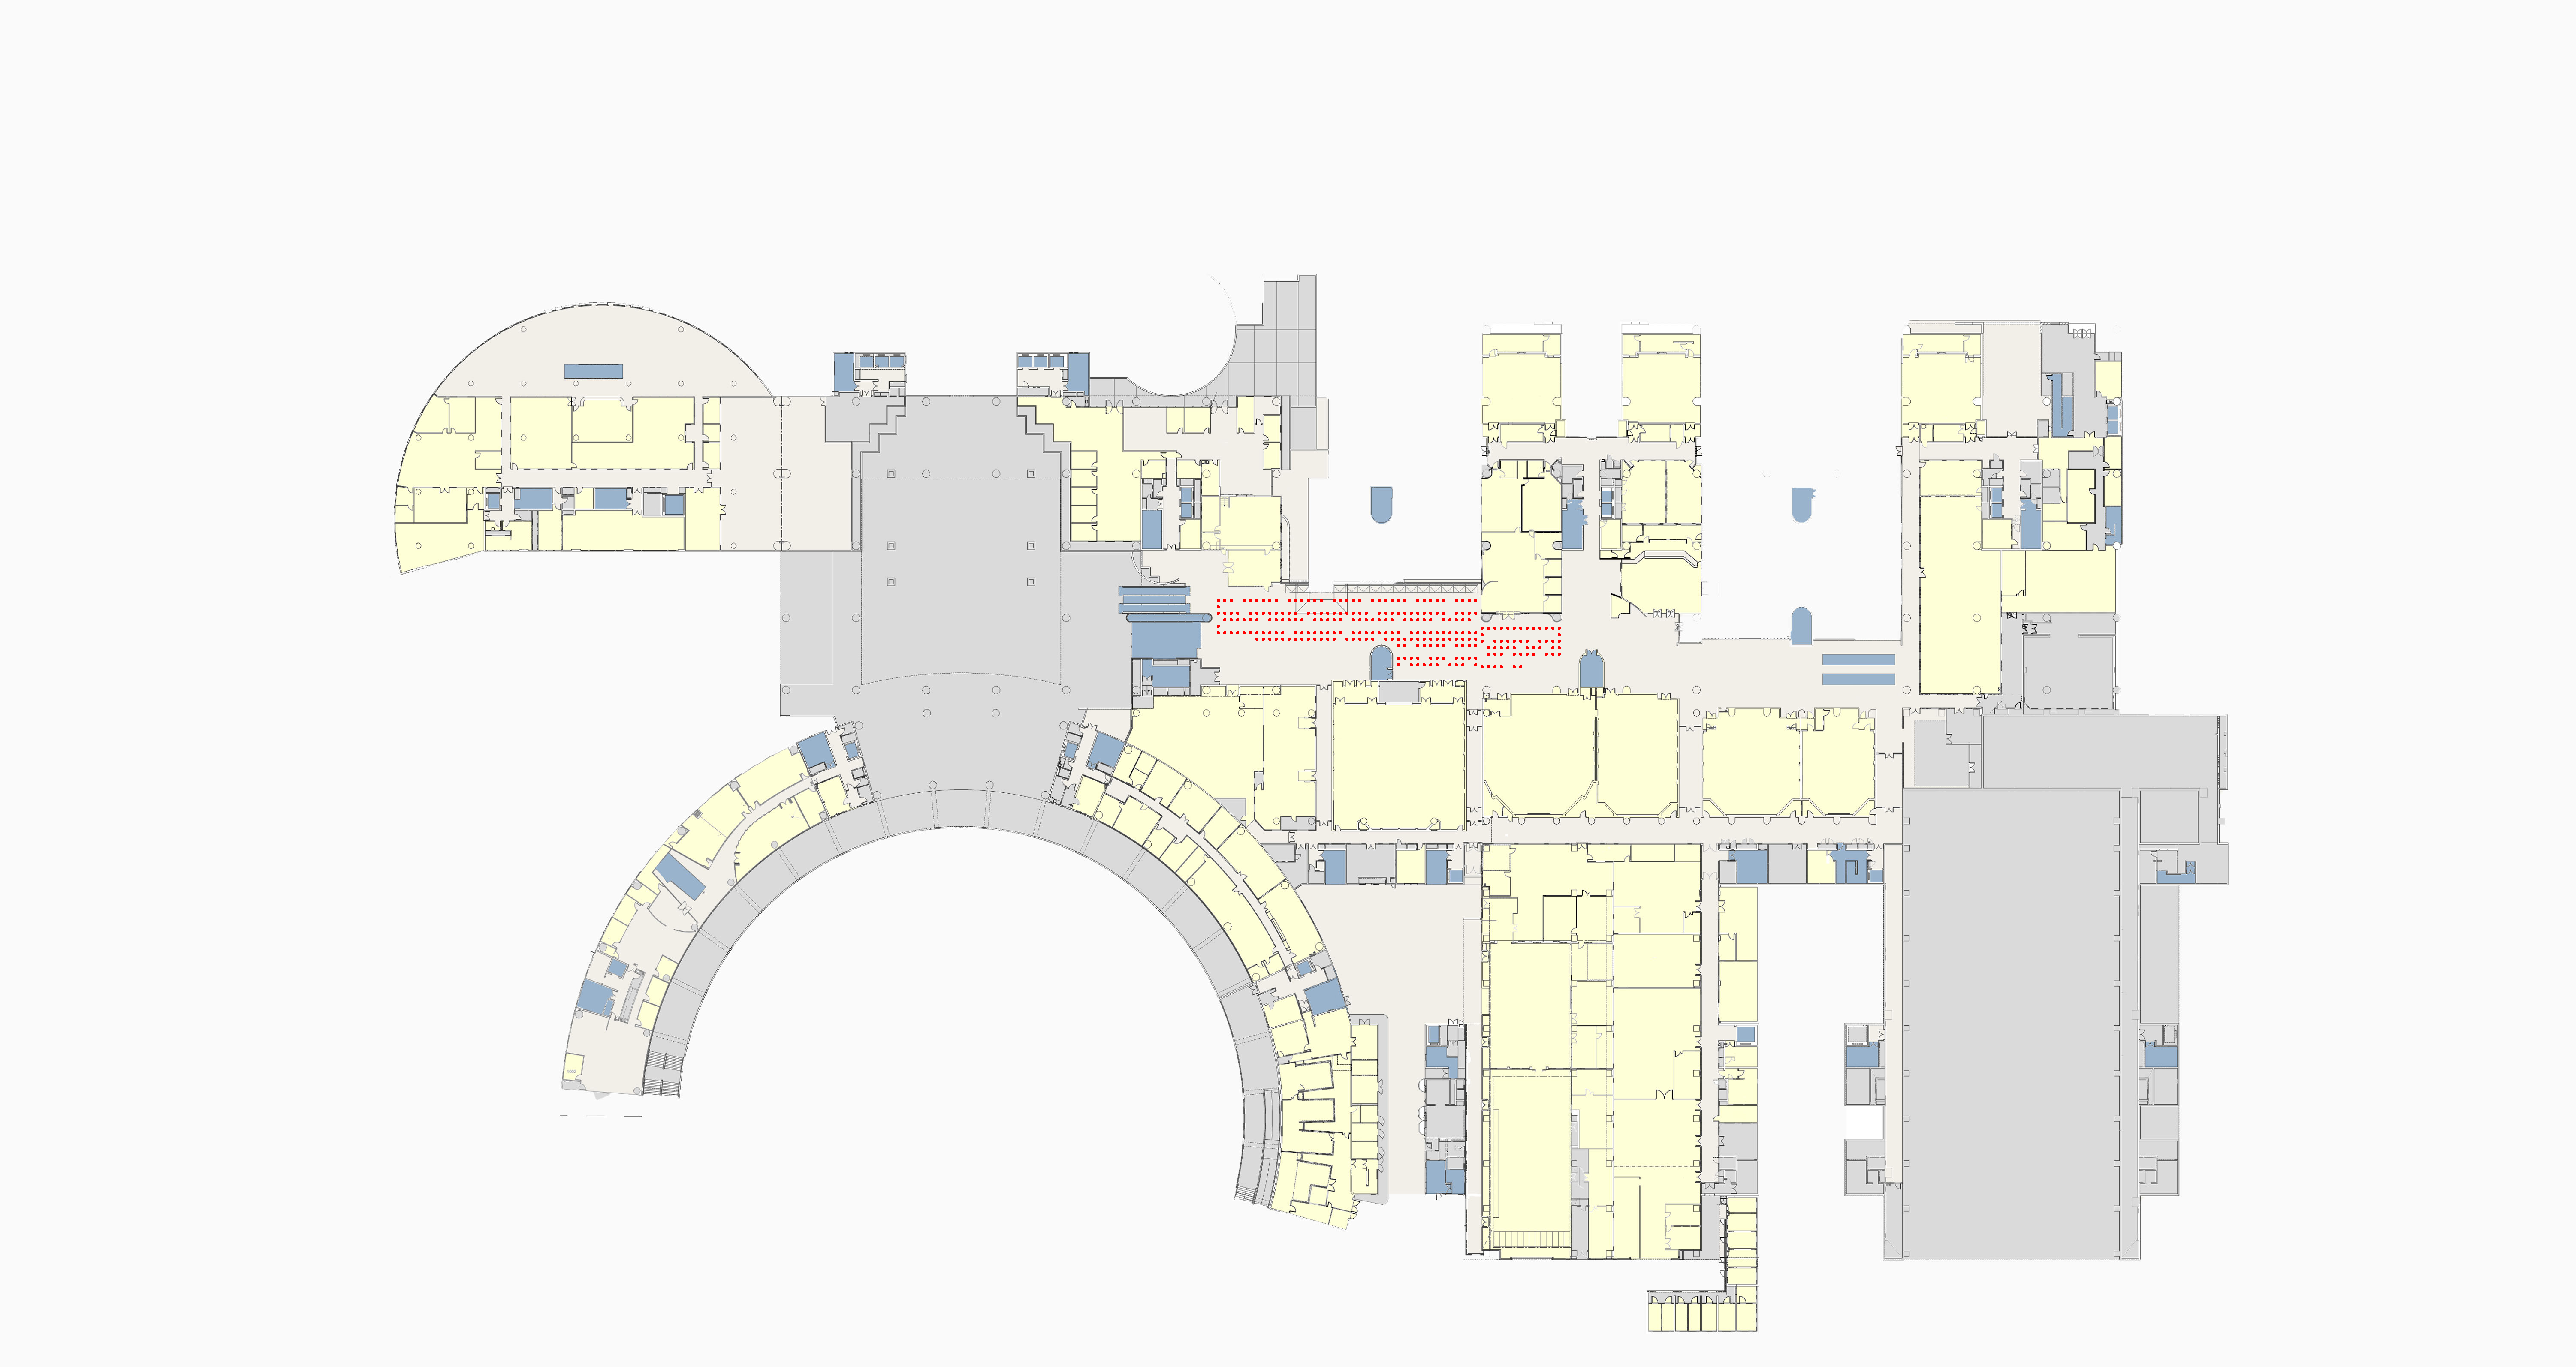

In [5]:
x_train, y_train = readMagneticData(glob.glob(os.path.join(dataset_dir, 'middle*_Sensors.txt')), grid_list, gridsize)

im = Image.open(map_path)
draw = ImageDraw.Draw(im)
for y in y_train:
    loc = grid_list[y.index(1)]
    draw.ellipse((loc[0]-3, loc[1]-3, loc[0]+3, loc[1]+3), fill=(255,0,0,255))

# im.show()

display(im)